### Created by: Anthony D. Cho
### Last update: 19.05.2021

**Subject**: Keras (Multi-Layer Perceptron MLP) - Applied to Combined Cycle Power Plant data in regression problem


## Libraries dependencies

In [1]:
from time import time
from pandas import read_csv
import matplotlib.pyplot as plt
from numpy import where
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## tensorflow-Keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics

## Customized functions

In [2]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    Historical performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

    @param width: width of the graphic display
    @type width: int

    @param height: height of the graphic display
    @type height: int

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

# Problem (Regression): Combined Cycle Power Plant Data Set

**Target**:  Predict the net hourly electrical energy output (PE) of the plant (Last column of dataset).

## Data loading and preprocessing

Source: [Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant) (UCI Repository)

In [6]:
start = time()
print('Loading data ...')

## Load data
data = read_csv('https://github.com/adoc-box/Datasets/blob/main/CCPP.csv?raw=true')

## Display Raw data
print('\n', data.head(), '\n')

## Data partition (hold-out validation)
print('Creating partition...')
trainValidationSet, testSet = train_test_split(data, train_size=0.85, random_state=0)
trainSet, validationSet = train_test_split(trainValidationSet, train_size=0.85, random_state=0)

## Data standardization (it return a numpy.ndarray)
print('Data standardizing...')
scaler = StandardScaler().fit(trainSet)
trainSet_scaled = scaler.transform(trainSet)
validationSet_scaled = scaler.transform(validationSet)
testSet_scaled = scaler.transform(testSet)

## Predictor (X) and target (y) assignment 
print('Predictor (X) and target (y) assignment... \n')
X_train, y_train = trainSet_scaled[:, :-1], trainSet_scaled[:, -1]
X_validation, y_validation = validationSet_scaled[:, :-1], validationSet_scaled[:, -1]
X_test, y_test = testSet_scaled[:, :-1], testSet_scaled[:, -1]

print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(Validation shape) X: {}, y: {}'.format(X_validation.shape, y_validation.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape), end='\n'*2)

print('Time spent[s]: ', time()-start)

Loading data ...

       AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90 

Creating partition...
Data standardizing...
Predictor (X) and target (y) assignment... 

(train shape) X: (6912, 4), y: (6912,)
(Validation shape) X: (1220, 4), y: (1220,)
(test shape) X: (1436, 4), y: (1436,)

Time spent[s]:  0.5933752059936523


## Build model

In [7]:
## Model instance
model = Sequential(name='Regression')
model.add(layers.Dense(units=10, 
                       activation='relu', 
                       input_shape=(X_train.shape[1],), 
                       name='Hidden_01'))
model.add(layers.Dense(units=13, 
                       activation='relu', 
                       name='Hidden_02'))
model.add(layers.Dense(units=1,
                       activation='linear', 
                       name='Output'))

## Compiler setting
model.compile(optimizer='adam', 
              loss='mae', 
              metrics=[metrics.MeanSquaredError(), metrics.MeanAbsolutePercentageError()])

## Display model
model.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_01 (Dense)            (None, 10)                50        
_________________________________________________________________
Hidden_02 (Dense)            (None, 13)                143       
_________________________________________________________________
Output (Dense)               (None, 1)                 14        
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


In [8]:
## Fit model
start = time()
history = model.fit(x=X_train, y=y_train, validation_data=(X_validation, y_validation),
                    epochs=50, 
                    batch_size=32)
print('Time spent[s]: ', time()-start)

Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 0.5869 - mean_squared_error: 0.5356 - mean_absolute_percentage_error: 326.5043 - val_loss: 0.2526 - val_mean_squared_error: 0.1023 - val_mean_absolute_percentage_error: 168.2270
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 0.2292 - mean_squared_error: 0.0846 - mean_absolute_percentage_error: 359.7638 - val_loss: 0.2207 - val_mean_squared_error: 0.0832 - val_mean_absolute_percentage_error: 147.5949
Epoch 3/50
216/216 [==============================] - 0s 2ms/step - loss: 0.2027 - mean_squared_error: 0.0708 - mean_absolute_percentage_error: 171.4944 - val_loss: 0.2091 - val_mean_squared_error: 0.0780 - val_mean_absolute_percentage_error: 138.2442
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 0.1944 - mean_squared_error: 0.0632 - mean_absolute_percentage_error: 199.4265 - val_loss: 0.2037 - val_mean_squared_error: 0.0750 - val_mean_absolute_percentage_error: 1

## Model performances display

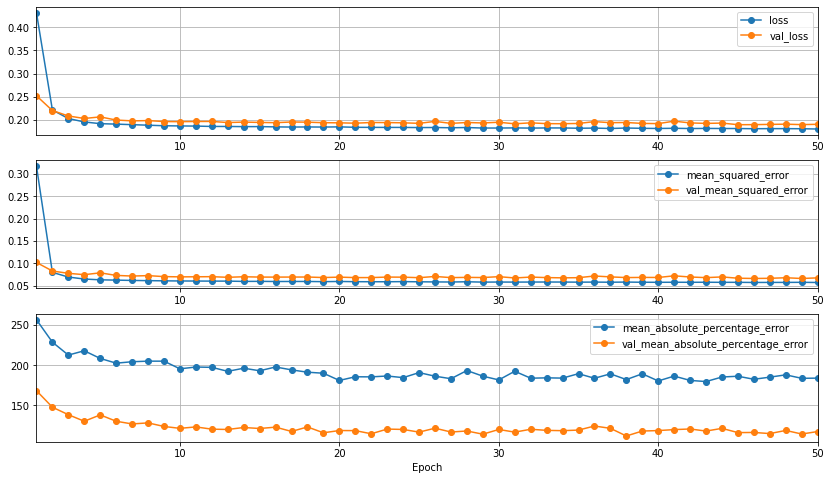

45/45 [==============================] - 0s 1ms/step - loss: 0.1814 - mean_squared_error: 0.0543 - mean_absolute_percentage_error: 62.8125


[0.18141821026802063, 0.05434317886829376, 62.81248474121094]

In [9]:
## Display performances
plot_history(history, width=14, height=8)

## Compute metrics using test set in the model
model.evaluate(X_test, y_test)

## Predictions

In [10]:
## Compute prediction using test set
prediction = model.predict(X_test)

In [11]:
## Un-scale target and output
y_test_unscaled = y_test*scaler.scale_[-1] + scaler.mean_[-1]
prediction_unscaled = prediction*scaler.scale_[-1] + scaler.mean_[-1]

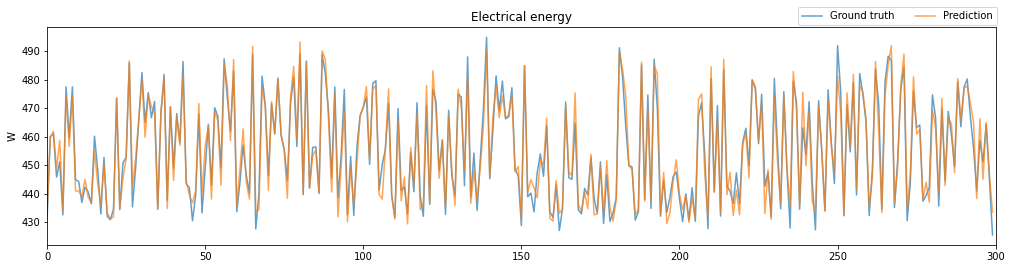

In [12]:
## Plot partially raw data and predictions

s, t = 0, 300
plt.figure(figsize=(17, 4))
plt.plot(y_test_unscaled[s:t], alpha=0.7, label='Ground truth')
plt.plot(prediction_unscaled[s:t], alpha=0.7, label='Prediction')
plt.legend(loc=[0.792, 1.01], ncol=2)
plt.title('Electrical energy'); plt.ylabel('W')
plt.xlim([s,t]); plt.show()